In [15]:
import pandas as pd

arquivo = pd.read_csv("Dados.csv")

display(arquivo.head(2))

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE


In [16]:
df = pd.DataFrame(arquivo)

regiao = df[df['REGIAO'] == 'SUDESTE']

cursos = regiao[["NOME_CURSO", "NOME_IES", "REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["NOME_CURSO", "NOME_IES", "REGIAO"]).sum()

cursos_ativos = cursos.query('QT_VAGAS_AUTORIZADAS != 0')

display(cursos_ativos)

cursos_ativos.to_excel('cursos_SUDESTE.xlsx')

QT_VAGAS_AUTORIZADAS
NOME_CURSO                                         NOME_IES                                           REGIAO                       
ABI - ARTES VISUAIS                                UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUIT... SUDESTE                     1
ABI - CIÊNCIAS BIOLÓGICAS                          UNIVERSIDADE ESTADUAL PAULISTA JÚLIO DE MESQUIT... SUDESTE                    82
ABI - CIÊNCIAS DA ATIVIDADE FÍSICA                 UNIVERSIDADE DE SÃO PAULO                          SUDESTE                    60
ABI - CIÊNCIAS DA NATUREZA                         INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOL... SUDESTE                    40
ABI - CIÊNCIAS DA NATUREZA: CIÊNCIAS E BIOLOGIA... INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNOL... SUDESTE                    80
...                                                                                                                             ...
ÓPTICA E OPTOMETRIA                                UNIVERSIDADE CIDADE DE SÃO PAULO                   SUDESTE                 64000
                                                   UNIVERSIDADE CRUZEIRO DO SUL                       SUDESTE                102000
                                                   UNIVERSIDADE DE FRANCA                             SUDESTE                  9500
                                                   UNIVERSIDADE POSITIVO                              SUDESTE                   500
                                                   UNIVERSIDADE VILA VELHA                            SUDESTE                   150

[24079 rows x 1 columns]

In [17]:
df2 = pd.DataFrame(arquivo)

cidade = df2[df2['REGIAO'] == 'SUDESTE']

cursos_sudeste = cidade[["CATEGORIA_ADMINISTRATIVA", "QT_VAGAS_AUTORIZADAS"]].groupby("CATEGORIA_ADMINISTRATIVA").sum()

display(cursos_sudeste)

cursos_sudeste.to_excel("vagas_sudeste.xlsx")

,QT_VAGAS_AUTORIZADAS
CATEGORIA_ADMINISTRATIVA,
Especial,16971
Privada com fins lucrativos,2273243510
Privada sem fins lucrativos,51256943
Pública Estadual,4443736
Pública Federal,594537
Pública Municipal,3472530


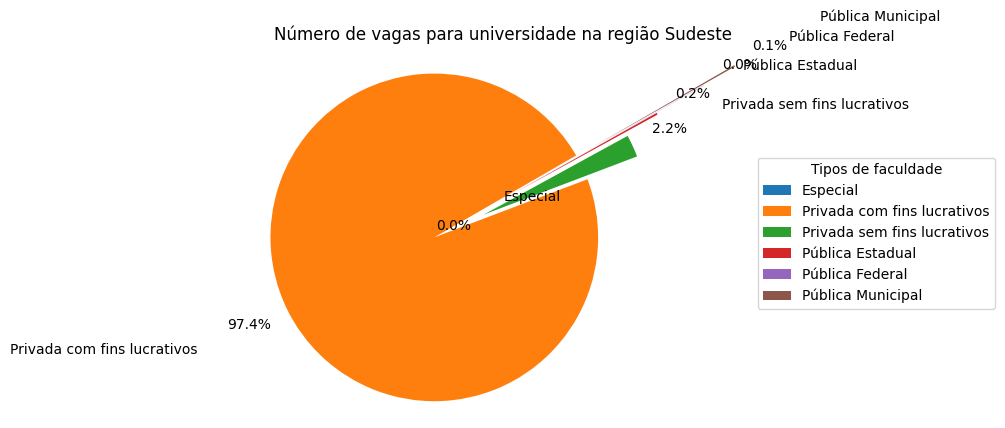

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

arquivo2 = pd.read_excel("vagas_sudeste.xlsx")

tipo_facu = arquivo2['CATEGORIA_ADMINISTRATIVA'].tolist()  # Converte para lista
qtd_vagas = arquivo2['QT_VAGAS_AUTORIZADAS'].tolist()  # Converte para lista

plt.title("Número de vagas para universidade na região Sudeste")

explode = (-1, 0, 0.3, 0.5, 0.8, 1.0)
plt.pie(qtd_vagas, labels=tipo_facu, explode=explode, startangle=30, autopct='%1.1f%%', pctdistance=1.25, labeldistance=1.6, radius=0.9)

legendas = plt.legend(tipo_facu, title="Tipos de faculdade" ,bbox_to_anchor=(1, 0.5), loc="center left")

plt.savefig('grafico-01.png', bbox_inches='tight')

plt.axis('equal')
plt.show()